Networkx Cheatsheet

http://sparkandshine.net/en/networkx-application-notes-draw-a-graph-with-matplotlib/

In [ ]:
G(graph)  # A networkx graph
pos(dictionary, optional)  # A dictionary with nodes as keys and positions as values.
                            # If not specified a spring layout positioning will be computed.
#                           See networkx.layout for functions that compute node positions.

arrows(bool, optional(default=True))  # For directed graphs, if True draw arrowheads.
with_labels(bool, optional(default=True))  # Set to True to draw labels on the nodes.
ax(Matplotlib Axes object, optional)  # Draw the graph in the specified Matplotlib axes.
nodelist(list, optional(default G.nodes()))  # Draw only specified nodes
edgelist(list, optional(default=G.edges()))  # Draw only specified edges
node_size(scalar or array,           optional(default=300))  # Size of nodes. If an array is
                                                                # specified it must be the same length as nodelist.

node_color(color string, or array of floats, (default          =’r’))  # Node color. Can be a single color format
# string, or a sequence of colors with the same length as nodelist. If numeric values are specified they will \
# be mapped to colors using the cmap and vmin,vmax parameters. See matplotlib.scatter for more details.

node_shape(string, optional(default=’o’))  # The shape of the node. Specification is as matplotlib.scatter marker.
alpha(float, optional(default=1.0))  # The node and edge transparency
cmap( colormap, optional(default=None))  # Colormap for mapping intensities of nodes

vmin, vmax(float, optional(default=None))  # Minimum and maximum for node colormap scaling
linewidths([None | scalar | sequence])  # Line width of symbol border (default =1.0)
width(float, optional(default=1.0))  # Line width of edges

edge_color( string, or array of floats( default=’r’))  # Edge color. Can be a single color format string, or a
# sequence of colors with the same length as edgelist. If numeric values are specified they will be mapped to
# colors using the edge_cmap and edge_vmin,edge_vmax parameters.

edge_cmap( colormap, optional(default=None))  # Colormap for mapping intensities of edges
edge_vmin, edge_vmax(floats, optional(default=None))  # Minimum and maximum for edge colormap scaling
style(string, optional(default=’solid’))  # Edge line style (solid|dashed|dotted,dashdot)
labels(dictionary, optional(default=None))  # Node labels in a dictionary keyed by node of text labels
font_size(int, optional(default=12))  # Font size for text labels
font_color(string, optional(default=’k’ black))  # Font color string
font_weight(string, optional(default=’normal’))  # Font weight
font_family(string, optional(default=’sans - serif’))  # Font family
label(string, optional)  # Label for graph legend


Classic graph operations
subgraph(G, nbunch) - induce subgraph of G on nodes in nbunch
union(G1,G2) - graph union
disjoint_union(G1,G2) - graph union assuming all nodes are different
cartesian_product(G1,G2) - return Cartesian product graph
compose(G1,G2) - combine graphs identifying nodes common to both
complement(G) - graph complement
create_empty_copy(G) - return an empty copy of the same graph class
convert_to_undirected(G) - return an undirected representation of G
convert_to_directed(G) - return a directed representation of G

Multigraph display

add edge labels

In [ ]:
G=nx.Graph()
e = [('a', 'b', 0.3), ('b', 'c', 0.9), ('a', 'c', 0.5), ('c', 'd', 1.2)]
G.add_weighted_edges_from(e)

pos = nx.spring_layout(G)
nx.draw(G,pos,node_size=700)
nx.draw_networkx_labels(G, pos)

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()



In [ ]:
# %%
sourceFile = os.path.join('two_component', "network_flow.xlsx")

net2 = pd.read_excel(io=sourceFile, sheet_name="multigraph")
import networkx  as nx
G= nx.from_pandas_edgelist(net2,source="from",target="to" , edge_attr = ["capacity"], create_using=nx.MultiGraph())
G.add_edges_from([("a","b")])
nx.draw(G)
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


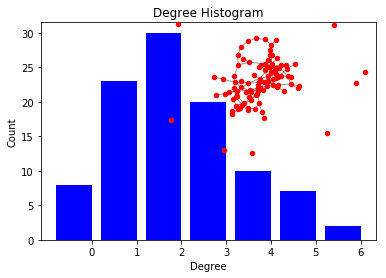

In [4]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

G = nx.gnp_random_graph(100, 0.02)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

max flow

In [5]:
dg = nx.DiGraph()
dg.add_edges_from([(1, 2, {'capacity': 12, 'weight': 4}),
                   (1, 3, {'capacity': 20, 'weight': 6}),
                   (2, 3, {'capacity': 6, 'weight': -3}),
                   (2, 6, {'capacity': 14, 'weight': 1}),
                   (3, 4, {'weight': 9}),
                   (3, 5, {'capacity': 10, 'weight': 5}),
                   (4, 2, {'capacity': 19, 'weight': 13}),
                   (4, 5, {'capacity': 4, 'weight': 0}),
                   (5, 7, {'capacity': 28, 'weight': 2}),
                   (6, 5, {'capacity': 11, 'weight': 1}),
                   (6, 7, {'weight': 8}),
                   (7, 4, {'capacity': 6, 'weight': 6})])
mincostFlow = nx.max_flow_min_cost(dg, 1, 7)
mincost = nx.cost_of_flow(dg, mincostFlow)
print ("mincost", mincost)
from networkx.algorithms.flow import maximum_flow
maxFlow = maximum_flow(dg, 1, 7)[1]
print( nx.cost_of_flow(dg, maxFlow) >= mincost)

mincostFlowValue = (sum((mincostFlow[u][7] for u in G.predecessors(7)))
                     - sum((mincostFlow[7][v] for v in G.successors(7))))
print(mincostFlowValue == nx.maximum_flow_value(G, 1, 7))




mincost 373
True
True


back up

import numpy as np
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt
import gurobipy as gu


def read_data(sheetName, header=0):
    sourceFile = "network_flow.xlsx"
    if not os.path.isfile(sourceFile):
        sourceFile = os.path.join("two_component", "network_flow20190516.xlsx")
    assert os.path.isfile(sourceFile)
    df = pd.read_excel(io=sourceFile, sheet_name=sheetName, header=header)

    if isinstance(header, list):

        if len(header) > 1:

            nets = {}
            for i in df.columns.levels[0]:
                nets[i] = df[i].dropna()
            df = nets
    return df


net2 = read_data("net2", header=[0, 1])



def maxFlowMinCost(diNet):
    ''' graph must have one node s and one node t '''
    w = {}
    mfmc = nx.max_flow_min_cost(diNet, s='s', t='t', capacity='capacity', weight='weight')
    for k, v in mfmc.items():
        if isinstance(v, dict):
            for k2, v2 in v.items():
                w[(k, k2)] = (diNet.get_edge_data(k, k2)['capacity'], v2)
        else:
            print("oops")
    return w


# %%


def permianNet():
    df = pd.read_excel(sourceFile, sheet_name="Permian_pipelines", usecols="A:M", nrows=56)

    df3 = df[["from", "to", 2022]]
    df3 = df3.pivot_table(values=2022, index=["from", "to"], aggfunc=np.sum)
    nodes = set(df3.index.levels[0]).union(set(df3.index.levels[1])).union(["end"])
    # df2.index = df2.index.values  # convert multinidex to tuple index # no need for this since to dict makes tupel index

    data_dict = df3.to_dict()[2022]
    end_nodes = {("Export", "end"): 100000.0, ("Refineries", "end"): 100000.0}
    data_dict = {**data_dict, **end_nodes}
    nodes_noPermina = list(set(nodes) - set(["end", "Permian"]))

    # the max flow optimization
    arcs, capacity = gu.multidict(data_dict)
    model = gu.Model("Permian")
    flow = model.addVars(arcs, name="flow")
    source = model.addVar(name="source")
    arcCapacity = model.addConstrs((flow[i, j] <= capacity[i, j] for i, j in arcs), 'arc capacity')
    model.addConstrs((flow.sum(i, '*') == flow.sum('*', i) for i in nodes_noPermina), name="in out flow equality")
    model.addConstr(flow.sum('Permian', '*') == flow.sum('*', 'end'))
    model.setObjective(gu.quicksum(flow['Permian', j] for i, j in arcs.select('Permian', '*')), sense=gu.GRB.MAXIMIZE)
    model.write('permian.lp')
    model.optimize()

    underutilized_arcs = {}
    for k, v in arcCapacity.items():
        if (v.slack > 0) and (k[1] not in ["Export", "Refineries", 'end']):
            underutilized_arcs[k] = v.slack

    plt.figure(figsize=(30, 20))
    G = nx.DiGraph()
    G.add_edges_from(arcs)
    z = {}
    for a in list(G.node.keys()):
        z[a] = a[:2]
    G = nx.relabel_nodes(G, z, copy=False)
    underutilizesd = [(it[0][:2], it[1][:2]) for it in underutilized_arcs.keys()]

    fixed_positions = {'Pe': (0, 0), 'Wi': (720, 250), 'Cu': (1088, 300), 'El': (1700, 300),
                       'Lo': (1250, 100), 'Be': (1622, -300),
                       'Ho': (1600, 0), 'Se': (1100, -290),
                       'Ga': (700, -300), 'Co': (800, -500),
                       'Fr': (1300, -500), 'Ga': (2000, -500),
                       # 'Te':(1660,-500),
                       'Me': (2000, 400),
                       'La': (1888, -270), 'Lo': (2168, -200),
                       'Th': (800, -400),
                       'Re': (2500, 100), 'Ex': (2500, -200), 'en': (2800, -50)}

    fixed_nodes = fixed_positions.keys()
    pos = nx.spring_layout(G, pos=fixed_positions, fixed=fixed_nodes)
    nx.draw(G, pos, with_labels=True, node_size=4000, font_size=30)
    nx.draw(G, pos, edgelist=underutilizesd, width=8, edge_color='b')
    plt.savefig("network.jpg", )
    plt.show()
    optimalFlow = {}
    for k, v in flow.items():
        optimalFlow[k] = v.x
    of = pd.DataFrame(pd.Series(optimalFlow)).unstack()[0].fillna(0)
    of.loc["Permian", :].sum()

    # for c in model.getConstrs():
    #     if c.Pi > 0:
    #         print(c.ConstrName, c.Pi)


permianNet()
# %%
net1 = read_data("net1")

dg = nx.DiGraph()
edge_labels = {}
for i, elrow in net1.iterrows():
    dg.add_edge(elrow[0], elrow[1], capacity=elrow[2], cost=elrow[2])
    edge_labels[(elrow[0], elrow[1])] = elrow[2]

edge_colors = list(net1.color)

# G.add_weighted_edges_from(net1)
bb = nx.edge_betweenness_centrality(dg, normalized=False)
pos = nx.spring_layout(dg)
dc = nx.degree_centrality(dg)
deg = list(dict(dg.degree).values())
deg = [d * 100 for d in deg]
dg.node['a']['fillcolor'] = 'red'
nodes = nx.draw_networkx_nodes(dg, pos, node_color='blue', node_size=deg, alpha=0.5)
# edges = nx.draw_networkx_edges(G, pos, node_size=dc, arrowstyle='->',
#                                arrowsize=10, edge_color=edge_colors,
#                                edge_cmap=plt.cm.Blues, width=2)
edges = nx.draw_networkx_edges(dg, pos, arrowstyle='->', width=net1["capacity"].__array__(), edge_color=net1["color"])
# nx.draw(G, pos, edge_color=edge_colors, node, with_labels=True)
nx.draw_networkx_labels(dg, pos)

# edge_labels= nx.get_edge_attributes(G,'attr_dict')
nx.draw_networkx_edge_labels(dg, pos, edge_labels)

plt.show()

# %%
for u in dg.edges.data('capacity'):
    print(u)

# %%
print(nx.max_flow_min_cost(dg, _s='a', _t='e', capacity="capacity"))
print(nx.maximum_flow(dg, _s='a', _t='e'))
print(nx.minimum_cut(dg, _s='a', _t='e'))
# %%
# components = nx.connected_components(dg)
degree_dict = dict(dg.out_degree(dg.nodes()))
betweenness_dict = nx.betweenness_centrality(dg)  # Run betweenness centrality
# eigenvector_dict = nx.eigenvector_centrality(dg) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(dg, betweenness_dict, 'betweenness')
# nx.set_node_attributes(dg, eigenvector_dict, 'eigenvector')
nx.set_node_attributes(dg, degree_dict, "degree")
edge_betweeness = nx.edge_betweenness_centrality(dg)

# %%
from operator import itemgetter

sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

# %% nets
nets = read_data("net3", header=[0, 1])

nets
# g3 = nx.from_pandas_edgelist(net3,create_using=nx.DiGraph)
# nx.draw(g3)
# plt.show()
# %%
net2 = read_data("net2", header=[0, 1])
net2['nodes']['pos'] = list(zip(net2['nodes'].x, net2['nodes'].y))
net2['nodes'].set_index(net2['nodes']['node'], inplace=True)
dg2 = nx.from_pandas_edgelist(net2['edges'], source='source', target='target', edge_attr=True, create_using=nx.DiGraph)
pos = nx.spring_layout(dg2)
edge_betweeness = nx.edge_betweenness_centrality(dg2)
edge_betweeness = dict(zip(edge_betweeness.keys(), [round(v, 2) for v in edge_betweeness.values()]))
# %%
nx.draw(dg2, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(dg2, pos, edge_labels=edge_betweeness)

plt.show()

print(nx.maximum_flow_value(dg2, _s=1, _t=12, capacity="capacity"))
print(nx.maximum_flow(dg2, _s=1, _t=12))
print(nx.minimum_cut(dg2, _s=1, _t=12))
# %%
# %%
net2 = read_data("net2", header=[0, 1])
net2['nodes']['pos'] = list(zip(net2['nodes'].x, net2['nodes'].y))
net2['nodes'].set_index(net2['nodes']['node'], inplace=True)
dg2 = nx.from_pandas_edgelist(net2['edges'], source='source', target='target', edge_attr=True, create_using=nx.DiGraph)
w = maxFlowMinCost(dg2)
mfv = nx.maximum_flow_value(dg2, _s='s', _t='t')
# %%
edgeFaultEffectonFlow = {}
faultyEdgeFlow = {}
for e in dg2.edges:
    g = dg2.copy()
    g[e[0]][e[1]]['capacity'] = 0
    edgeFaultEffectonFlow[e] = maxFlowMinCost(g)

    faultyEdgeFlow[e] = nx.maximum_flow_value(g, _s='s', _t='t')

faultDF = pd.DataFrame.from_dict(edgeFaultEffectonFlow)
faultDF.set_index(faultDF.index.values, inplace=True)
faultDF.columns = faultDF.columns.values
fault2 = faultDF.copy()

faultDF = faultDF.applymap(lambda x: x[1])
faultDF["normal"] = pd.Series(w)
faultDF
# def firstElement(row):
#     for i, flowww in enumerate(row):
#
#         row[i]=flowww[1]
#     return row
# faultDF.apply(lambda x: firstElement(x),axis=1)

# %%
# %%
e_labels = {}
ebc = nx.edge_betweenness_centrality(dg2)
for k, e in w.items():
    e_labels[k] = str(e) + "\n" + str(round(ebc[k], 3)) + "-" + str(mfv - faultyEdgeFlow[k], )

# %%
def networkChart(g,pos,e_labels):
    nx.draw(g, pos=pos, with_labels=True)
    nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=e_labels)
    plt.savefig(str(e)+'.jpg')
    plt.show()

nx.draw(dg2, pos=net2['nodes']['pos'].to_dict(), with_labels=True)

nx.draw_networkx_edge_labels(dg2, pos=net2['nodes']['pos'].to_dict(), edge_labels=e_labels)
plt.show()



geometric 


In [ ]:
G = nx.random_geometric_graph(50, 0.25)
# position is stored as node attribute data for random_geometric_graph


pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(20, 20))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)
nx.draw_networkx_labels(G,pos)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.savefig("bignet3.jpg")
plt.show()


In [6]:
import matplotlib.pyplot as plt
import jgraph
jgraph.draw([(1, 2), (2, 3), (3, 4), (4, 1), (4, 5), (5, 2)])
plt.show()